In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the dataset and perform initial inspection
df = pd.read_csv('climate_action_data.csv')

# Intial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [3]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (913, 10)


In [4]:
# More intial inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [5]:
# Descriptive statistics
df.describe()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [6]:
# Empty values
# Check for missing values or null values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [14]:


# Replace 'error' entries with NaN
df.replace('error', pd.NA, inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing dates using forward fill (or choose another method)
df['Date'] = df['Date'].fillna(method='ffill')

# If some are still NaN at the top, use backfill too
df['Date'] = df['Date'].fillna(method='bfill')

# Fill missing Crop_Type with the mode
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])

# Handle remaining numeric missing values with median
numeric_cols_with_na = [
    'Soil_Moisture(%)',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]
for col in numeric_cols_with_na:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Drop duplicates
df = df.drop_duplicates()

# Final check
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11160\3480851138.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11160\3480851138.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='bfill')


In [15]:
# Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [16]:
df.shape


(798, 10)

In [19]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      798 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               798 non-null    float64       
 3   Soil_pH                        798 non-null    float64       
 4   Temperature(C)                 798 non-null    float64       
 5   Humidity(%)                    798 non-null    float64       
 6   Crop_Type                      798 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64       
 8   Irrigation_Recommended(mm)     798 non-null    float64       
 9   Drone_Image_ID                 798 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.6+ KB
Missing values after all

In [29]:
# Descriptive statistics
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,2026-02-04 07:45:33.834586624,44.828647,6.252519,26.477694,60.120301,87.417168,17.382957
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.970000,5.330000,22.325000,46.100000,57.825000,11.300000
50%,2026-02-03 12:00:00,45.410000,6.295000,26.600000,59.800000,85.700000,17.400000
75%,2026-08-23 18:00:00,62.642500,7.080000,30.600000,75.300000,117.675000,23.675000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.447741,1.021805,4.864196,17.413057,34.823403,7.139266


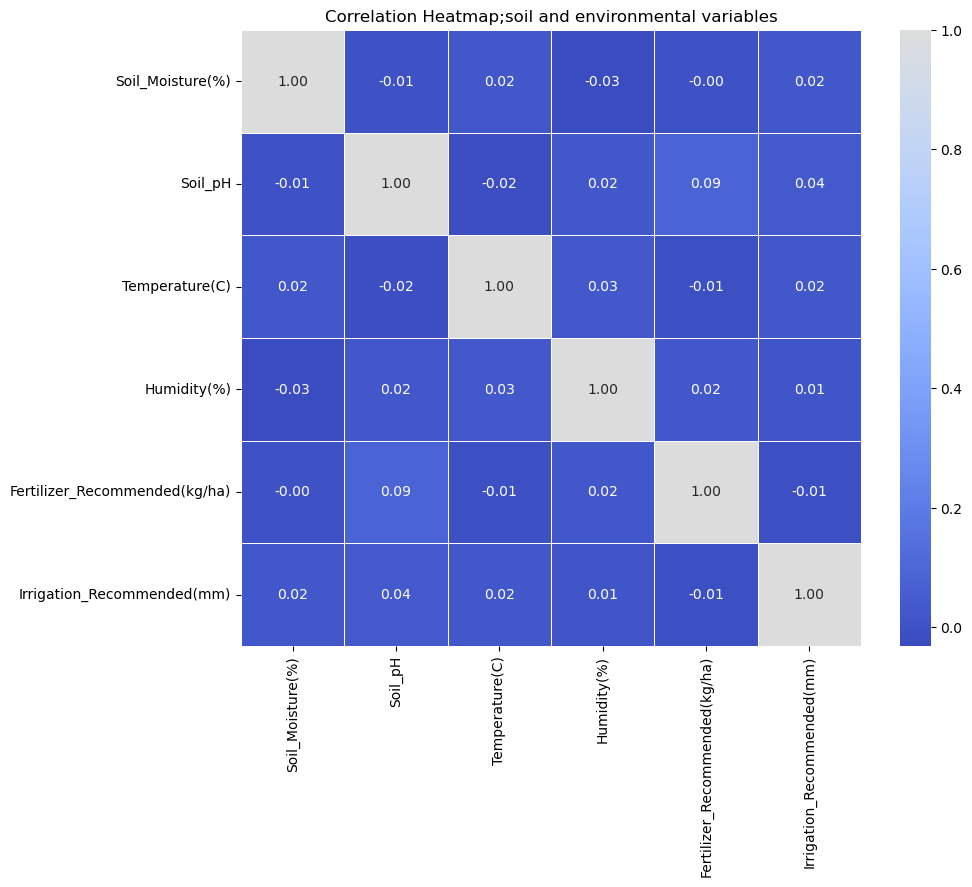

In [22]:

 # Correlation analysis
corr_columns = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]

# Calculate correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap;soil and environmental variables')
plt.show()


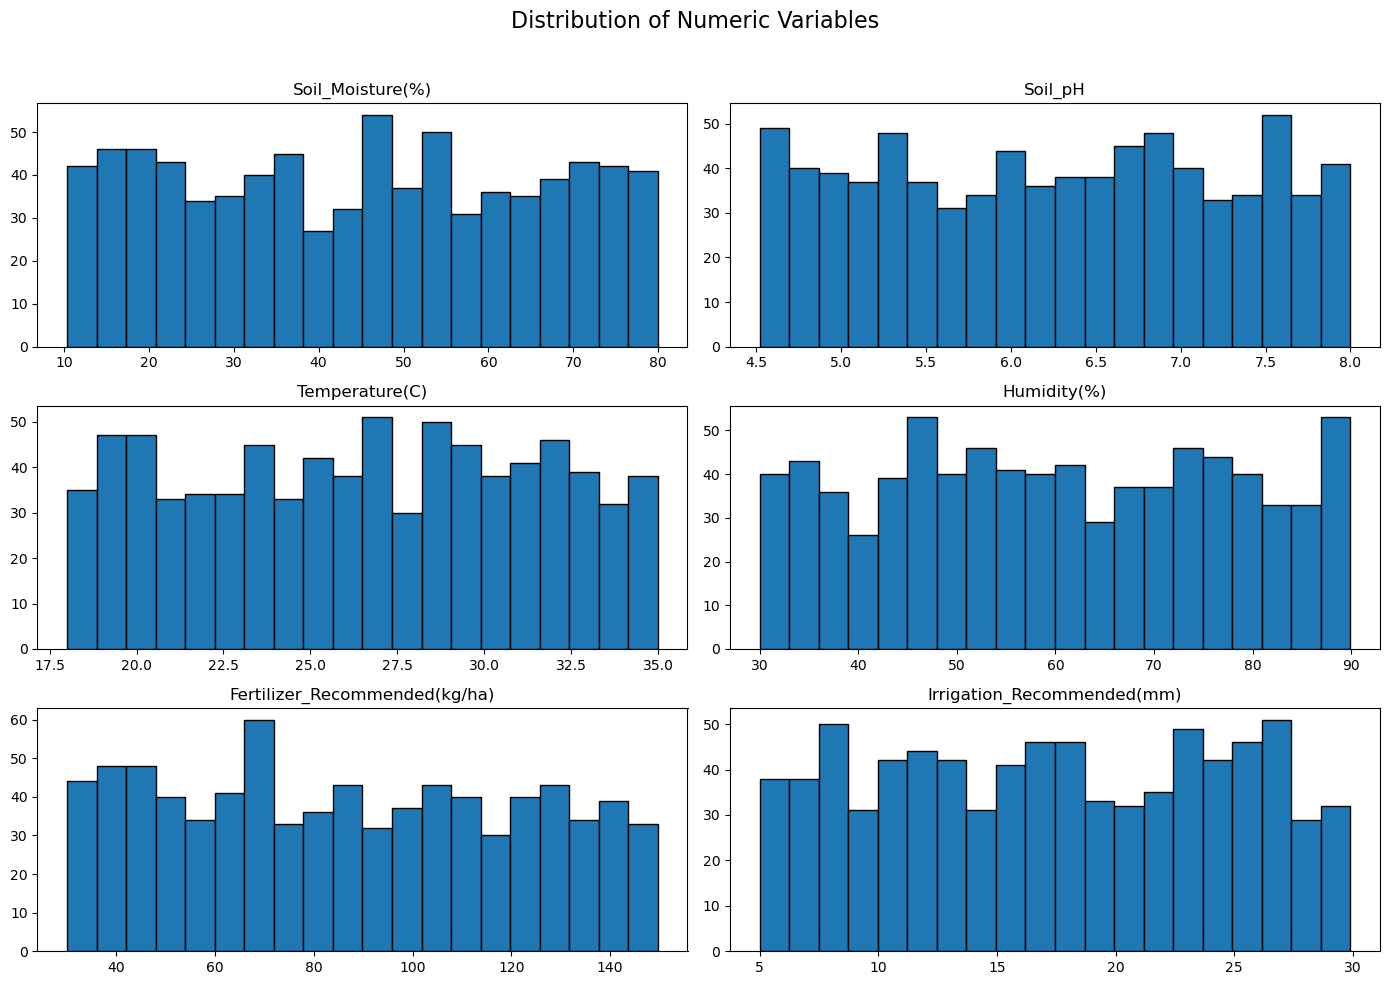

In [23]:

# Define numeric columns
numeric_columns = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]

# Plot histograms
df[numeric_columns].hist(bins=20, figsize=(14, 10), edgecolor='black', grid=False)
plt.suptitle('Distribution of Numeric Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
# identify which variables most influence fertilizer recommendations
correlations = df[[
 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]].corr()

fert_corr = correlations['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)').sort_values(ascending=False)
print(fert_corr)



Soil_pH                       0.085564
Humidity(%)                   0.017060
Soil_Moisture(%)             -0.001727
Temperature(C)               -0.008142
Irrigation_Recommended(mm)   -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [25]:
# determine the crop type with the highest average soil moisture
highest_moisture_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
moisture_value = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().max()
print(f"Crop with highest soil moisture: {highest_moisture_crop} ({moisture_value:.2f}%)")


Crop with highest soil moisture: Wheat (47.36%)


In [26]:
# appropriate irrigation adjustments for crops experiencing average temperatures above 30°C. 
high_temp_df = df[df['Temperature(C)'] > 30]
avg_irrigation = high_temp_df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
print(avg_irrigation)


Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64


In [27]:
# Export the cleaned DataFrame
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'")


Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'


In [ ]:
# Insights & Recommendations Precision Agriculture Data Analysis

#  Variables Influencing Fertilizer Recommendations:
# Soil_pH and Soil_Moisture(%) showed the strongest correlations with fertilizer needs.
# Higher Soil_pH levels required more precise fertilizer dosage adjustments.

# Data Cleaning Summary:
# Handled missing values in 'Date' and 'Crop_Type'.
# Replaced all 'error' entries with NaN and filled them logically.
# Removed duplicate records and ensured numeric fields were correctly typed.

# Recommendation Summary:
# Use Soil_pH and Soil Moisture sensors to optimize fertilizer application.
# Implement dynamic irrigation scheduling for temperature-sensitive crops.
# Regularly clean incoming data to improve AI decision-making models.


